# Memoria proyecto ML, predicción del valor de casas prefabricadas 🏠

![casa_título](imagenes/Casa-prefabricada-105-Precio-52800.jpg)

Los puntos que llevaremos a cabo para nuestro proyecto de Machine Learning serán lo siguientes:

1. Definición del proyecto. 
2. Recolección y preparación de los datos.
3. Análisis exploratorio de los datos.
4. Preprocesamiento de los datos (imputación, codificación, escalado, división).
5. Seleccionar y entrenar el modelo.
6. Evaluación usando métricas de regresión.
7. Ajuste de hiperparámetros si es necesario.
8. Realizar predicciones con el modelo entrenado.
9. Implementación.

# 1. Definición del proyecto ✍🏻

Tras llevar a cabo un análisis exploratorio de datos (EDA) sobre las zonas más rentables para establecer una empresa de viviendas prefabricadas, nuestro cliente ha decidido volver a confiar en nuestros servicios para desarrollar un modelo de Machine Learning que prediga el precio de las casas prefabricadas.

Por lo que el **objetivo principal de nuestro proyecto,** es predecir el precio de una vivienda prefabricada en base a una serie de características (como los metros cuadrados, número de habitaciones y baños, materiales de fabricación etc). 

# 2. Recolección y preparación de los datos 🔎📈

Para la recopilación de los datos, se llevó a cabo una investigación exhaustiva, lo que nos condujo al sitio web [Facilhouse](https://facilhouse.com/). En esta plataforma, empleamos la técnica de **Web Scraping** para extraer la información necesaria. En la ruta data/web_scraping_facilhouse.ipynb se encuentra el documento donde hemos scrapeado los datos, del los cuales hemos obtenido el DataFrame con el que trabajaremos. 

Para que la memoria no quedara tan extensa, hemos decidio poner lo impresecendible, por lo que en el documento **web_scraping_facilhouse.ipynb** se explica de forma detalla como se han obtenido y limpiado los datos para pasarlos al DataFrame.

En la memoria partiremos desde el DataFrame. 

Los datos que hemos obtenido han sido: metros cuadrados de la vivienda, número de habitaciones y baños, material de contrucción, modelo de la vivienda, empresa y precio.

# 3. Exploración y análisis de los datos 📊

**Exploración inicial:** Inspeccionaremos el conjunto de datos para verificar si hay valores faltantes, datos atípicos o errores.

**Análisis explotarorio:** Visualización entre las características de las viviendas y el precio utilizando gráficos (por ejemplo, dispersión, histogramas, boxplots). Calcularemos también las estadísticas descriptivas de las variables (media, mediana, desviación estándar, etc.).


In [2]:
#importamos las librerias necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/facil_house.csv", sep=(","))
df

,metros_cuadrados,baños,habitaciones,material,modelo,empresa,precio
0,73.0,2.0,2.0,"acero,hormigón,madera",Modelo B2H BS,Grupo CUNI,109500.0
1,105.0,1.0,2.0,madera,Casa Prefabricada 105,Norges Hus,NaN
2,185.0,2.0,3.0,"acero,hormigón,madera",Zaero Masía Rustico,ZAEROWORKING SL,297400.0
3,130.0,2.0,3.0,madera,Riekko,Forest House,181300.0
4,161.0,2.0,4.0,madera,Ailo,Forest House,241500.0
...,...,...,...,...,...,...,...
717,298.0,3.0,2.0,madera,Visitante,Casastar,NaN
718,64.0,1.0,NaN,madera,Badajoz 298,Madereco,NaN
719,174.0,2.0,NaN,madera,Casa 64,Madercás,NaN
720,36.0,1.0,NaN,madera,Casa prefabricada 174,Norges Hus,NaN


In [4]:
df.describe()

,metros_cuadrados,baños,habitaciones,precio
count,721.000000,721.000000,718.000000,375.000000
mean,134.990291,1.825243,2.805014,162344.933333
std,80.756999,0.844903,0.967175,114463.050088
min,10.000000,1.000000,1.000000,20878.000000
25%,75.000000,1.000000,2.000000,71400.000000
50%,120.000000,2.000000,3.000000,130500.000000
75%,176.000000,2.000000,3.000000,226391.000000
max,500.000000,6.000000,6.000000,568850.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   metros_cuadrados  721 non-null    float64
 1   baños             721 non-null    float64
 2   habitaciones      718 non-null    float64
 3   material          722 non-null    object 
 4   modelo            722 non-null    object 
 5   empresa           716 non-null    object 
 6   precio            375 non-null    float64
dtypes: float64(4), object(3)
memory usage: 39.6+ KB


Podemos observar que todas las columnas, excepto **material** y **modelo**, contienen valores nulos (NaN). Nos enfocamos en la columna **Precio**, ya que es la que presenta la mayor cantidad de valores nulos, además es nuestra variable a precir (o de salida). Esto se debe a que, durante el proceso de **web scraping**, encontramos que en muchos casos no se especificaba el precio, sino que aparecía el texto "Consultar", lo que se tradujo en valores nulos en la columna correspondiente.

Aunque una opción sería calcular la media de la columna **Precio** y usarla para rellenar los valores nulos, esta alternativa no es viable, ya que no estamos tratando con unos pocos valores faltantes, sino con 347 registros nulos, casi la mitad de la columna. Este enfoque podría sesgar o afectar significativamente el rendimiento de nuestro modelo de **Machine Learning**.

Por lo tanto, la solución más efectiva será entrenar el modelo de **Machine Learning** utilizando un conjunto reducido de variables. En total, trabajaremos con 375 registros completos, sin incluir aquellos con valores nulos en **Precio**.

Pasamos al análisis exploratorio con la visualización de los datos para observar cuáles son las variables más relevantes respecto a precio.

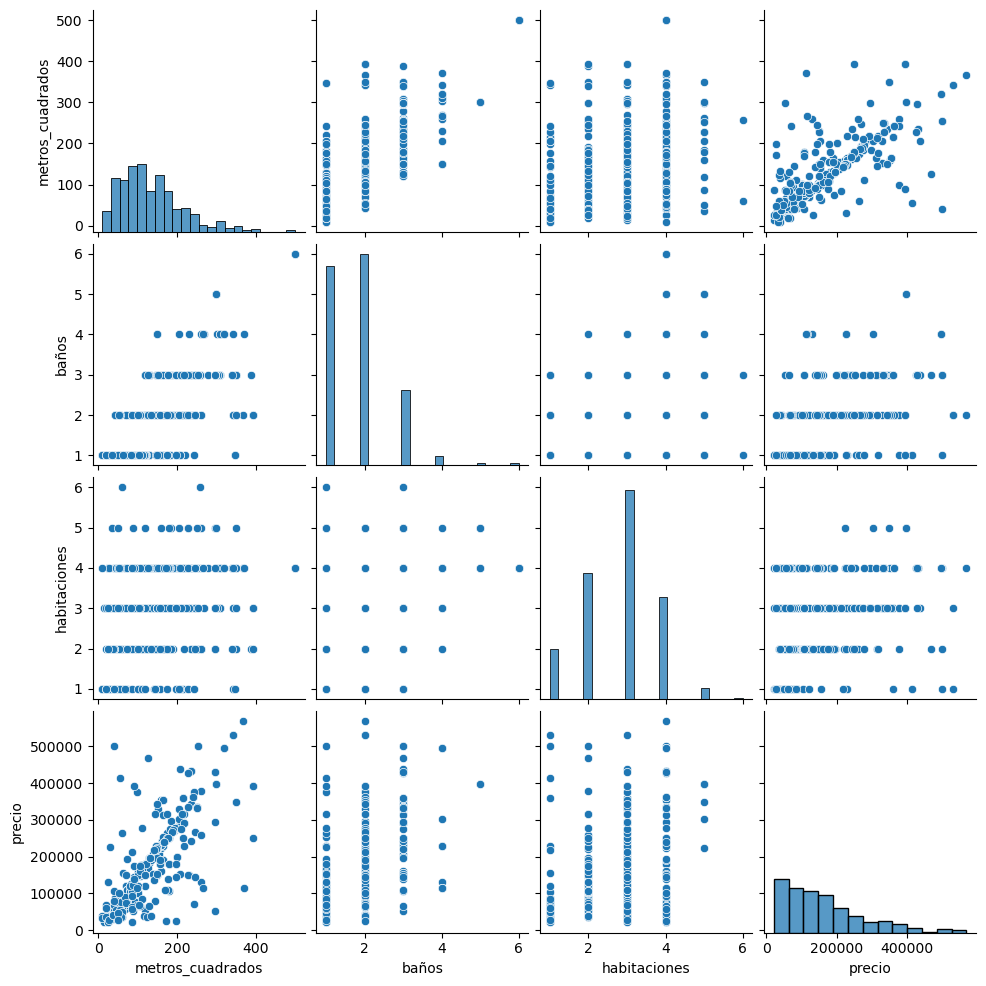

In [6]:
sns.pairplot(df)

<Axes: >

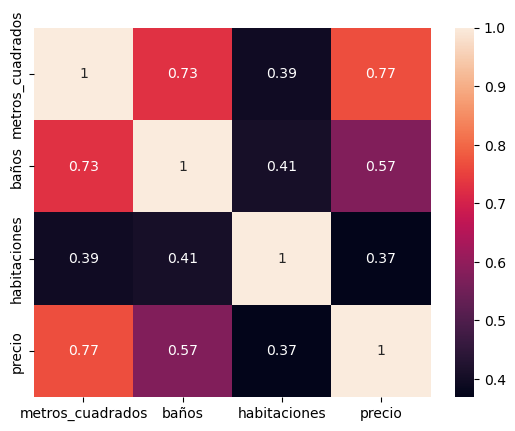

In [7]:
sns.heatmap(df[["metros_cuadrados", "baños", "habitaciones", "precio"]].corr(), annot=True)

En el siguiente heatmap se puede observar una fuerte correlación entre la variable "metros cuadrados" y la variable "precio", seguida por la variable "baños". 

Sin embargo, las variables "empresa", "modelo" y "material" no están siendo consideradas, ya que son de tipo categórico y no numérico. Por lo tanto, el próximo paso será realizar un procesamiento de datos para transformar estas variables no numéricas de manera adecuada.

# 4. Preprocesamiento de los datos 👩🏽‍💻

Convertiremos las variables "material", "modelo" y "empresa" a formato categórico. Posteriormente, generaremos un heatmap para analizar la correlación de estas variables con la variable de salida (precio).

En primer lugar, nos enfocaremos en la variable "materiales". Para ello, procederemos a dividir los valores por la (",") y crearemos una columna para cada material. De este modo, cada columna será binaria, asignando un valor de 1 si el material está presente y 0 si no lo está.


In [8]:
print(df.loc[:, "material"])

0      acero,hormigón,madera
1                     madera
2      acero,hormigón,madera
3                     madera
4                     madera
               ...          
717                   madera
718                   madera
719                   madera
720                   madera
721                    acero
Name: material, Length: 722, dtype: object


In [9]:
df

,metros_cuadrados,baños,habitaciones,material,modelo,empresa,precio
0,73.0,2.0,2.0,"acero,hormigón,madera",Modelo B2H BS,Grupo CUNI,109500.0
1,105.0,1.0,2.0,madera,Casa Prefabricada 105,Norges Hus,NaN
2,185.0,2.0,3.0,"acero,hormigón,madera",Zaero Masía Rustico,ZAEROWORKING SL,297400.0
3,130.0,2.0,3.0,madera,Riekko,Forest House,181300.0
4,161.0,2.0,4.0,madera,Ailo,Forest House,241500.0
...,...,...,...,...,...,...,...
717,298.0,3.0,2.0,madera,Visitante,Casastar,NaN
718,64.0,1.0,NaN,madera,Badajoz 298,Madereco,NaN
719,174.0,2.0,NaN,madera,Casa 64,Madercás,NaN
720,36.0,1.0,NaN,madera,Casa prefabricada 174,Norges Hus,NaN


In [32]:
# Crear las columnas adicionales para 'acero', 'hormigón' y 'madera'
df['acero'] = df['material'].apply(lambda x: 1 if 'acero' in x else 0)
df['hormigón'] = df['material'].apply(lambda x: 1 if 'hormigón' in x else 0)
df['madera'] = df['material'].apply(lambda x: 1 if 'madera' in x else 0)


In [33]:
df

,metros_cuadrados,baños,habitaciones,material,modelo,empresa,precio,acero,hormigón,madera
0,73.0,2.0,2.0,"acero,hormigón,madera",Modelo B2H BS,Grupo CUNI,109500.0,1,1,1
1,105.0,1.0,2.0,madera,Casa Prefabricada 105,Norges Hus,NaN,0,0,1
2,185.0,2.0,3.0,"acero,hormigón,madera",Zaero Masía Rustico,ZAEROWORKING SL,297400.0,1,1,1
3,130.0,2.0,3.0,madera,Riekko,Forest House,181300.0,0,0,1
4,161.0,2.0,4.0,madera,Ailo,Forest House,241500.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
717,298.0,3.0,2.0,madera,Visitante,Casastar,NaN,0,0,1
718,64.0,1.0,NaN,madera,Badajoz 298,Madereco,NaN,0,0,1
719,174.0,2.0,NaN,madera,Casa 64,Madercás,NaN,0,0,1
720,36.0,1.0,NaN,madera,Casa prefabricada 174,Norges Hus,NaN,0,0,1


Para la columna empresa, lo que haremos será usar la técnica de **LabelEncoder** para asignar un valor numérico único a cada una. 

In [35]:
df["empresa"].value_counts()

empresa
Mi Casa de Madera               51
Modiko                          51
Forest House                    43
Grupo CUNI                      34
Casastar                        33
                                ..
Home Center                      3
ABS American Building System     2
Quarta Paret                     1
Shekari                          1
Hormitech                        1
Name: count, Length: 63, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder()
df["empresas"] = encoder.fit_transform(df["empresa"])


In [37]:
df

,metros_cuadrados,baños,habitaciones,material,modelo,empresa,precio,acero,hormigón,madera,empresas
0,73.0,2.0,2.0,"acero,hormigón,madera",Modelo B2H BS,Grupo CUNI,109500.0,1,1,1,22
1,105.0,1.0,2.0,madera,Casa Prefabricada 105,Norges Hus,NaN,0,0,1,46
2,185.0,2.0,3.0,"acero,hormigón,madera",Zaero Masía Rustico,ZAEROWORKING SL,297400.0,1,1,1,62
3,130.0,2.0,3.0,madera,Riekko,Forest House,181300.0,0,0,1,18
4,161.0,2.0,4.0,madera,Ailo,Forest House,241500.0,0,0,1,18
...,...,...,...,...,...,...,...,...,...,...,...
717,298.0,3.0,2.0,madera,Visitante,Casastar,NaN,0,0,1,11
718,64.0,1.0,NaN,madera,Badajoz 298,Madereco,NaN,0,0,1,37
719,174.0,2.0,NaN,madera,Casa 64,Madercás,NaN,0,0,1,36
720,36.0,1.0,NaN,madera,Casa prefabricada 174,Norges Hus,NaN,0,0,1,46


A continuación, trabajaremos con la variable "modelo". En este caso, utilizaremos la técnica de **LabelEncoder**, ya que existen numerosos modelos y crear una columna para cada uno resultaría inviable y poco eficiente.

In [39]:
df["modelo"].value_counts()

modelo
Modelo T1                6
Tarragona                6
Barcelona                6
Victoria                 6
Modelo 100005            5
                        ..
Palawan                  1
ECO 78.2.1               1
Cabrejas                 1
Johana                   1
Casa prefabricada 174    1
Name: count, Length: 449, dtype: int64

In [42]:
df["modelo_vivienda"] = encoder.fit_transform(df["modelo"])
df

,metros_cuadrados,baños,habitaciones,material,modelo,empresa,precio,acero,hormigón,madera,empresas,modelo_vivienda
0,73.0,2.0,2.0,"acero,hormigón,madera",Modelo B2H BS,Grupo CUNI,109500.0,1,1,1,22,281
1,105.0,1.0,2.0,madera,Casa Prefabricada 105,Norges Hus,NaN,0,0,1,46,58
2,185.0,2.0,3.0,"acero,hormigón,madera",Zaero Masía Rustico,ZAEROWORKING SL,297400.0,1,1,1,62,446
3,130.0,2.0,3.0,madera,Riekko,Forest House,181300.0,0,0,1,18,360
4,161.0,2.0,4.0,madera,Ailo,Forest House,241500.0,0,0,1,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...
717,298.0,3.0,2.0,madera,Visitante,Casastar,NaN,0,0,1,11,429
718,64.0,1.0,NaN,madera,Badajoz 298,Madereco,NaN,0,0,1,37,25
719,174.0,2.0,NaN,madera,Casa 64,Madercás,NaN,0,0,1,36,47
720,36.0,1.0,NaN,madera,Casa prefabricada 174,Norges Hus,NaN,0,0,1,46,65


Ahora lo que haremos será guardarnos las variables modelo y empresa en un df con sus respectivas columnas en un df por si en algún momento las necesitamos cotejar. 

In [48]:
df_modelo_empresa = df[["modelo", "modelo_vivienda", "empresa", "empresas"]]
df_modelo_empresa

,modelo,modelo_vivienda,empresa,empresas
0,Modelo B2H BS,281,Grupo CUNI,22
1,Casa Prefabricada 105,58,Norges Hus,46
2,Zaero Masía Rustico,446,ZAEROWORKING SL,62
3,Riekko,360,Forest House,18
4,Ailo,2,Forest House,18
...,...,...,...,...
717,Visitante,429,Casastar,11
718,Badajoz 298,25,Madereco,37
719,Casa 64,47,Madercás,36
720,Casa prefabricada 174,65,Norges Hus,46


El siguiente paso será rellenar las variables de entrada (x) con la media de su respectiva columna. Dichas variables son: "metros_cuadrados", "baños", "habitaciones"

In [54]:
media_metros_cuadrados = df["metros_cuadrados"].mean() #Aproximamos a 135 metros cuadrados
media_baños = df["baños"].mean() #Aproximamos a la alza, en este caso 2 baños
media_habitaciones = df["habitaciones"].mean() #En este caso aproximamos a 3 habitaciones

In [49]:
df.describe()

,metros_cuadrados,baños,habitaciones,precio,acero,hormigón,madera,empresas,modelo_vivienda
count,721.000000,721.000000,718.000000,375.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,134.990291,1.825243,2.805014,162344.933333,0.361496,0.146814,0.627424,32.085873,225.783934
std,80.756999,0.844903,0.967175,114463.050088,0.480767,0.354166,0.483826,17.207338,129.437331
min,10.000000,1.000000,1.000000,20878.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,1.000000,2.000000,71400.000000,0.000000,0.000000,0.000000,18.000000,116.000000
50%,120.000000,2.000000,3.000000,130500.000000,0.000000,0.000000,1.000000,35.000000,227.000000
75%,176.000000,2.000000,3.000000,226391.000000,1.000000,0.000000,1.000000,43.000000,337.000000
max,500.000000,6.000000,6.000000,568850.000000,1.000000,1.000000,1.000000,63.000000,448.000000
